# Motivation

On earth day 2020 numerous governments around the world made new commitments to reducing CO2 emissions. 

- USA - https://www.msn.com/en-gb/news/world/biden-calls-climate-action-a-moral-imperative-pledges-to-halve-co2-emissions-by-2030/ar-BB1fVXd7
- Ireland - https://www.irishtimes.com/news/environment/ireland-tired-of-being-considered-laggards-on-climate-action-ryan-1.4544555

It can be hard to reason about such commitments (as well as past ones such as the Paris Agreement) just as it is hard to reason about the wider situation.

The charts in this notebook are an attempt to dispell some of the ambiguity and to communicate a few key realities around the task at hand.

# Climate Change Challenge

The sources of data used in this article are listed below. They are professional and reputable. The datasets and the resources that accompany them on the relevant sites should be used as primary sources over and above their use or interpretation in this article.

- Energy data from https://ourworldindata.org/energy-production-consumption
- Population data from https://www.worldometers.info/world-population/world-population-by-year/
- CO2 emissions data
    - https://ourworldindata.org/co2-emissions
    - https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
- Temperature data is from https://www.metoffice.gov.uk/hadobs/hadcrut5/
    - Note: Temperature Anomaly data in this dataset is relative to 1961-1990 climatology. The target temperature rises that policy makers refer to are relative to pre-industrial temperatures. The difference is roughly 3.75 degrees - we add this value to the temperature values from the dataset for the purposes of this article.
 


In [1]:
# load flypy
import types
from urllib.request import urlopen


flypy = types.ModuleType('flypy')
url = 'https://gist.githubusercontent.com/skycompute/38b52ddcf311b22d5d7746097d0bf3db/raw/04399b29a4364a117c4300f52abe1c1fb2eb9ad3/flypy.py'
with urlopen(url) as response:
    exec(response.read(), flypy.__dict__)

In [2]:
# get the functions we need using flypy
csv_from_url = flypy.fly_gist('6d14db0c0daa4cb24e60db7a1c166728',custom_module=flypy, top_level=True)
ranges_and_spaces = flypy.fly_gist('249286eda01294278f584262009763c6', custom_module=flypy, top_level=True)
plot_lines = flypy.fly_gist('ed48dc19bb2a698bd09d6c8bddd3783c', custom_module=flypy, top_level=True)

In [3]:
# get the population data
url = 'https://drive.google.com/uc?export=download&id=1xtV4YHdLFqpEWY4yhVDv71MnF6QhH6p9'
population = list(flypy.csv_from_url(url))[1:]
population_by_year = {r[0]: r for r in population}

In [4]:
# get the energy data
import csv
# substitution method
url = 'https://drive.google.com/uc?export=download&id=10VgS5VpJfan2XVU9N4mcPf_QjtrNx0LY'
# direct
url = 'https://drive.google.com/uc?export=download&id=1QL6XSxkaiM_0oScpapqIPfN2EU5Nr0J7'
direct_energy_sustainable_cols = [4,8,9,10,11,12]
direct_energy_unsustainable_cols = [3,5,6,7]

energy_data = list(csv_from_url.csv_from_url(url, dialect='excel', quoting=csv.QUOTE_MINIMAL))[1:]
for year in energy_data:
    year.append(sum( (int(year[i]) for i in direct_energy_sustainable_cols) ))
    year.append(sum( (int(year[i]) for i in direct_energy_unsustainable_cols) ))
    year.append(sum([int(v) for v in year[3:13]]))
    
energy_data_by_year = {int(year[2]): year for year in energy_data}


# get the CO2 data
url = 'https://drive.google.com/uc?export=download&id=1H1I8CwQUWxxlkimiLZjpqy_Sg_CL1CFS'
co2 = list(flypy.csv_from_url(url, dialect='excel', quoting=csv.QUOTE_MINIMAL))[1:]
regions = set([
    "Africa",
    "Asia",
    "EU-27",
    "Europe",
    "Europe (excl. EU-27)",
    "International transport",
    "North America",
    "Oceania",
    "South America"
])
co2_totals = {}
for r in co2:
    year = int(r[2])
    value = float(r[3])
    if r[0] in regions:
        if year not in co2_totals:
            co2_totals[year] = value
        else:
            co2_totals[year] += value

# Get the temperature data
from urllib.request import urlopen
import netCDF4 as nc

url = 'https://drive.google.com/uc?export=download&id=1z1hIzbEAPX9Uh3CYzmKZieMoiPe2GJnB'
with urlopen(url) as remote_file:
    nc_bytes = remote_file.read()
nc = nc.Dataset('inmemory.nc', memory=nc_bytes)

temps = {}
year = 2020
for i in reversed(nc['tas_mean'][:]):
    temps[year] = i
    year -= 1

    
global_co2_emissions_target = 15000000000

# The Global Picture

In the figure below we show a number of different measures on the same figure. We have measures for
- population
- total energy used
- Sustainable Energy used
- Unsustainable Energy used
- CO2 emissions
- the average temperature anomaly (the difference from what is considered expected baseline without human effects)
- the target maximum temperature rise

We keep the horizontal axis at 0 for all these measures but scale the y axis for some measures so that we immediately see the correlations and differences between them. What should stand out to any reader is that

- sustainable energy is a tiny fraction of total energy usage and that it is growing slowly
- that population, total energy and the temperature anomaly are very closely correlated
- the temperature rise is already very close to the target limit and none of the trends are slowing



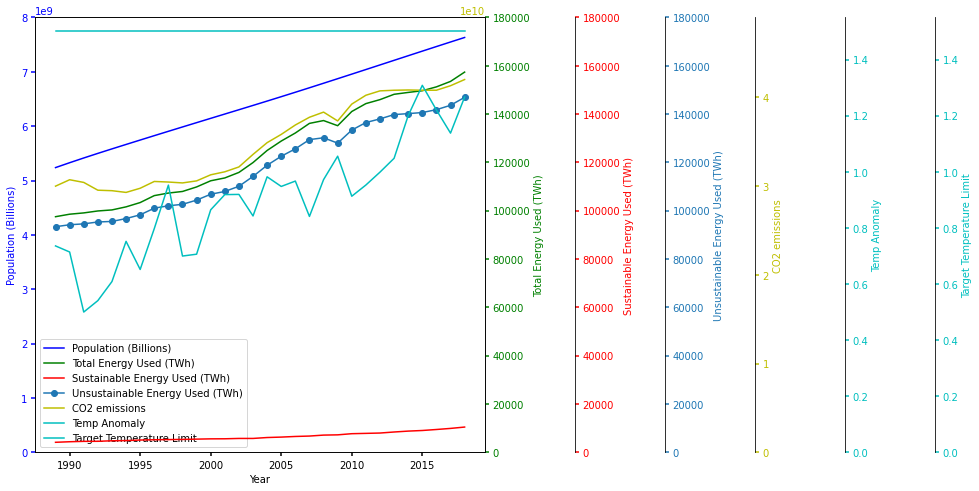

In [7]:
# plot the graph
lines = [
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [int(population_by_year[year][1]) for year in range(1989, 2019)],
        'color':'b', 'label': 'Population (Billions)', 'ylim':[0, 8000000000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [energy_data_by_year[year][-1] for year in range(1989, 2019)],
        'color':'g', 'label': 'Total Energy Used (TWh)', 'ylim': [0, 180000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [energy_data_by_year[year][-3] for year in range(1989, 2019)],
        'color':'r', 'label': 'Sustainable Energy Used (TWh)', 'ylim': [0, 180000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [energy_data_by_year[year][-2] for year in range(1989, 2019)],
        'color':'o', 'label': 'Unsustainable Energy Used (TWh)', 'ylim': [0, 180000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [co2_totals[year] for year in range(1989, 2019)],
        'color':'y', 'label': 'CO2 emissions', 'ylim': [0, 49004682371]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [temps[year]+0.375 for year in range(1989, 2019)],
        'color':'c', 'label': 'Temp Anomaly', 'ylim': [0, 1.55]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [1.5 for year in range(1989, 2019)],
        'color':'c', 'label': 'Target Temperature Limit', 'ylim': [0, 1.55]
    }
]
flypy.plot_lines(lines, xlabel='Year', plt_width_height=(10,8))

By focusing on energy this chart leaves out a number of sources of Carbon i.e.

- agricultural, forestry and land use
- industrial (chemical, concrete)
- waste

These sources account for about 27% of Carbon emissions. We will focus on energy here for simplicity and because it represents the clearest opportunity for emissions reductions.

# The Global Challenge

The next chart aims to depict one possible future starting from where we are now and making a few assumptions. Policy makers are touting a figure of 15 Billion tonnes as a global target for Carbon emissions so we show that as a target and investigate when it might be reached. Current emissions are already far in excess 15 GT (over 40 GT and up to 55 depending on your data). 

The chart assumes the following:

- the current rate of sustainable energy production and usage continues to grow at 3.3% 
    - average of annual growth rates from 1989 to 2019
- the current rate of energy usage continues to grow by a constant amount of 2064 TWh a year (average increase from 1989 to 2019 in TWh)
    - The growth rate of energy usage globally is currently flunctuating. It has been growing exponentially and it may still be doing so. However, we take a conservative position to match the general narrative that our energy usage is slowing down and to drive home any point that can be made about our having to do more to reach our stated goals.
- the target value of annual CO2 emissions that we should aim for as 15 Billion tonnes
    - the reported number varies from source to source as there are different ways people are accounting for CO2 there are different targets (1.5 degress of warming, 2.0 degrees of warming, total carbon emitted over some time period etc.)

N.B. The dotted lines on the chart show real data from the past. They are there to give context to the assumption of a linear growth in energy usage.

What should stand out from this chart to any reader is

- if our conservative assumptions hold we probably won't reach the target in this century and that that spells disaster
- we won't even produce as much sustainable energy as unsustainable energy until 2100

In [8]:
import statistics

# calc energies

# sustainable
sustainable_rate = 1+statistics.mean([(energy_data_by_year[year][-3]-energy_data_by_year[year-1][-3])/energy_data_by_year[year-1][-3] for year in range(1990, 2019)])

# unsustainable
unsustainable_rate = 1+statistics.mean([(energy_data_by_year[year][-2]-energy_data_by_year[year-1][-2])/energy_data_by_year[year-1][-2] for year in range(1990, 2019)])
diffs = [(energy_data_by_year[year][-2]-energy_data_by_year[year-1][-2]) for year in range(1990, 2019)]
unsustainable_ave_amount = statistics.mean(diffs)

# total
total_rate = 1+statistics.mean([(energy_data_by_year[year][-1]-energy_data_by_year[year-1][-1])/energy_data_by_year[year][-1] for year in range(1990, 2019)])
total_ave_amount = statistics.mean([(energy_data_by_year[year][-1]-energy_data_by_year[year-1][-1]) for year in range(1990, 2019)])

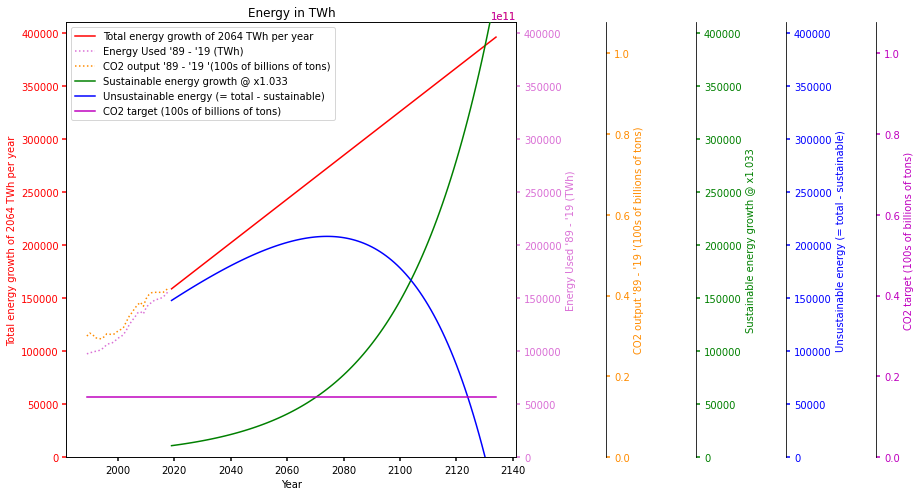

In [9]:
# unsustainable growth linear & sustainable growth exponential
final_year = 2135

y_total = [energy_data_by_year[2019][-1]]
for i in range(2020, final_year):
    y_total.append(y_total[-1] + total_ave_amount)

y_sustainable = [energy_data_by_year[2019][-3]]
for i in range(2020, final_year):
    y_sustainable.append(y_sustainable[-1] * sustainable_rate)

y_unsustainable = [energy_data_by_year[2019][-2]]
for i,j in zip(y_total[1:], y_sustainable[1:]):
    y_unsustainable.append(i-j)

lines = [
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_total,
        'color':'r', 'label': f'Total energy growth of {total_ave_amount:.0f} TWh per year', 
        'ylim': [0, 410000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [energy_data_by_year[year][-1] for year in range(1989, 2019)],
        'color':'orchid', 'linestyle': 'dotted', 'label': "Energy Used '89 - '19 (TWh)", 
        'ylim': [0, 410000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [co2_totals[year] for year in range(1989, 2019)],
        'color':'darkorange', 'linestyle': 'dotted', 'label': "CO2 output '89 - '19 '(100s of billions of tons)", 'ylim': [0, 107568914998]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_sustainable,
        'color':'g', 'label': f'Sustainable energy growth @ x{sustainable_rate:,.3f}', 
        'ylim': [0, 410000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_unsustainable,
        'color':'b', 'label': f'Unsustainable energy (= total - sustainable)', 
        'ylim': [0, 410000]
    },
    {
        'x': [year for year in range(1989, final_year)],  
        'y': [15000000000 for year in range(1989, final_year)],
        'color':'m', 'label': 'CO2 target (100s of billions of tons)', 'ylim': [0, 107568914998]
    },
]
flypy.plot_lines(lines, xlabel='Year', title='Energy in TWh', plt_width_height=(10,8))


## Required Rate of Change

The following chart is the same as the previous except we adjust the rate of sustainable energy growth to meet the 15 GT target by 2050. The rate of growth required is around 8%.

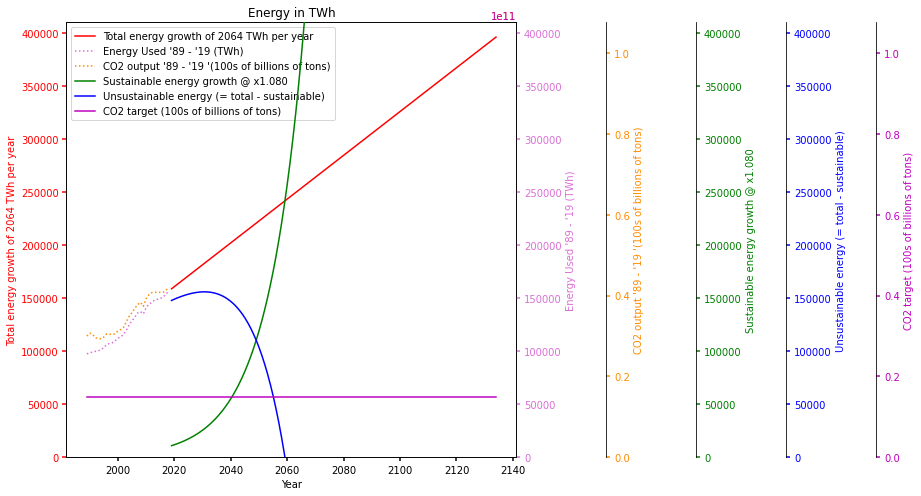

In [11]:
# meet 15 GT Globally by 2050


final_year = 2135

y_total = [energy_data_by_year[2019][-1]]
for i in range(2020, final_year):
    y_total.append(y_total[-1] + total_ave_amount)

y_sustainable = [energy_data_by_year[2019][-3]]
for i in range(2020, final_year):
    y_sustainable.append(y_sustainable[-1] * 1.08)

y_unsustainable = [energy_data_by_year[2019][-2]]
for i,j in zip(y_total[1:], y_sustainable[1:]):
    y_unsustainable.append(i-j)

lines = [
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_total,
        'color':'r', 'label': f'Total energy growth of {total_ave_amount:.0f} TWh per year', 
        'ylim': [0, 410000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [energy_data_by_year[year][-1] for year in range(1989, 2019)],
        'color':'orchid', 'linestyle': 'dotted', 'label': "Energy Used '89 - '19 (TWh)", 
        'ylim': [0, 410000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [co2_totals[year] for year in range(1989, 2019)],
        'color':'darkorange', 'linestyle': 'dotted', 'label': "CO2 output '89 - '19 '(100s of billions of tons)", 
        'ylim': [0, 107568914998]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_sustainable,
        'color':'g', 'label': f'Sustainable energy growth @ x{1.08:,.3f}', 
        'ylim': [0, 410000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_unsustainable,
        'color':'b', 'label': f'Unsustainable energy (= total - sustainable)', 
        'ylim': [0, 410000]
    },
    {
        'x': [year for year in range(1989, final_year)],  
        'y': [15000000000 for year in range(1989, final_year)],
        'color':'m', 'label': 'CO2 target (100s of billions of tons)', 'ylim': [0, 107568914998]
    },
]
flypy.plot_lines(lines, xlabel='Year', title='Energy in TWh', plt_width_height=(10,8))

## The Case of Non-linear Energy Usage Growth

It is possible that we will see total energy grow non-linearly globally in the near future. This would obviously make meeting a 15 GT CO2 output level more difficult. The next chart shows that if energy grew at 1.6% (the average annual growth for the last 30 years) then we would not see the 15 GT goal being met until late in next century.

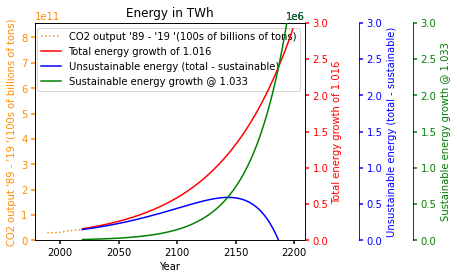

In [51]:
# unsustainable growth linear & sustainable growth exponential
final_year = 2200

y_total = [energy_data_by_year[2019][-1]]
for i in range(2020, final_year):
    y_total.append(y_total[-1] * total_rate)

y_sustainable = [energy_data_by_year[2019][-3]]
for i in range(2020, final_year):
    y_sustainable.append(y_sustainable[-1] * sustainable_rate)

y_unsustainable = [energy_data_by_year[2019][-2]]
for i,j in zip(y_total[1:], y_sustainable[1:]):
    y_unsustainable.append(i-j)

lines = [
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [co2_totals[year] for year in range(1989, 2019)],
        'color':'darkorange', 'linestyle': 'dotted', 'label': "CO2 output '89 - '19 '(100s of billions of tons)", 
        'ylim': [0, 857568914998]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_total,
        'color':'r-', 'label': f'Total energy growth of {total_rate:.3f}', 
        'ylim': [0, 3000000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_unsustainable,
        'color':'b-', 'label': f'Unsustainable energy (total - sustainable)', 
        'ylim': [0, 3000000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_sustainable,
        'color':'g-', 'label': f'Sustainable energy growth @ {sustainable_rate:,.3f}', 
        'ylim': [0, 3000000]
    }
]
flypy.plot_lines(lines, xlabel='Year', title='Energy in TWh')

# The U.S.A.

The USA is an interesting case study. As a highly developed country its energy usage has been plateauing. However its sustainable energy growth does lag slightly behind the global rate. Also, its president has just made an audacious commitment to to reducing CO2 output to half of 2005 levels. 

The next chart gives a picture of the energy usage and carbon output of the US over the last 30 years. You can see that Carbon output has been declining. Total energy use and unsustainable energy has risen and fallen but it is hard to determine a solid trend.

In [37]:
#US energy data
d3_google_hash = '1qZW2rQTSyaqh0dEQOcTKlM_dHdXx8l2k'
def gdrive(h):
    return "https://drive.google.com/uc?export=download&id=" + h

us_energy_url = gdrive(d3_google_hash)

country_energy = list(flypy.csv_from_url(us_energy_url, dialect='excel', quoting=csv.QUOTE_MINIMAL))
us_sustainable = {}
us_unsustainable = {}
for row in country_energy:
    if row[0] == "United States":
        year = int(row[2])
        unsus_value = sum([int(float(row[x])) for x in [3,4,5]])
        sus_value = sum([int(float(row[x])) for x in [6,7,8,9,10,11]])
        us_sustainable[year] = sus_value
        us_unsustainable[year] = unsus_value
        
        
# us population
us_pop_hash = '1Au75jXKjZ9D_6CEp-MQFS8g6xlum0vos'
populations = list(flypy.csv_from_url(gdrive(us_pop_hash), dialect='excel', quoting=csv.QUOTE_MINIMAL))
us_populations = [x for x in populations if x[0] == 'United States']
us_populations = {int(r[2]):r for r in us_populations}


# us carbon data
carbon_data = gdrive("1H1I8CwQUWxxlkimiLZjpqy_Sg_CL1CFS")
carbon_data = list(flypy.csv_from_url(carbon_data, dialect='excel', quoting=csv.QUOTE_MINIMAL))
us_carbon = [x for x in carbon_data if x[0] == 'United States']
us_carbon = {int(float(r[2])):int(float(r[3])) for r in us_carbon}
a = list(us_carbon.items())

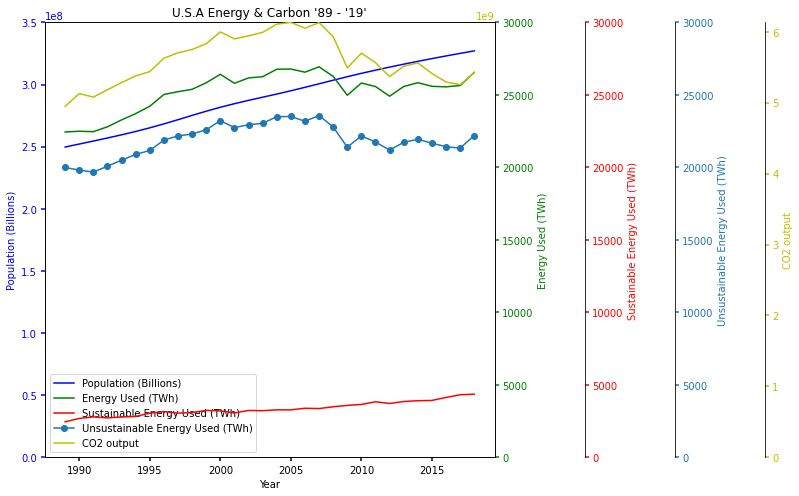

In [16]:
# us energy
lines = [
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [int(us_populations[year][3]) for year in range(1989, 2019)],
        'color':'b-', 'label': 'Population (Billions)', 'ylim':[0, 350000000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [us_unsustainable[year]+us_sustainable[year] for year in range(1989, 2019)],
        'color':'g-', 'label': 'Energy Used (TWh)', 'ylim': [0, 30000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [us_sustainable[year] for year in range(1989, 2019)],
        'color':'r-', 'label': 'Sustainable Energy Used (TWh)', 'ylim': [0, 30000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [us_unsustainable[year] for year in range(1989, 2019)],
        'color':'o-', 'label': 'Unsustainable Energy Used (TWh)', 'ylim': [0, 30000]
    },
    {
        'x': [year for year in range(1989, 2019)],  
        'y': [int(float(us_carbon[year])) for year in range(1989, 2019)],
        'color':'y-', 'label': 'CO2 output', 'ylim': [0, max([x for x in us_carbon.values()])+1000]
    }
]
flypy.plot_lines(lines, xlabel='Year', title="U.S.A Energy & Carbon '89 - '19'", plt_width_height=(10,8))

## Biden's Earth Day 2021 Commitment

Biden's commitment to lowering CO2 output to one half of 2005 levels by 2030 was received with much fanfare but it is hard for the general public to really grasp the meaning of it - how audacious it is and what will need to be done to achieve it. The next chart shows what will happen in the future given some assumptions listed below. Again, we use energy consumption as a proxy for total CO2 output. 

Assumptions:

- The USA's total energy consumption remains the same in the future (not rising or falling)
- The rate of increase of sustainable energy usage stays the same as the average of the annual change between 1989 and 2019 - 2.1%
    - and so the amount of unsustainable energy used fall by the same TWh amount

You can see that this predicts the goal being reaching in about 2075.

In [42]:
us_unsustainable_rate = 1+statistics.mean([(us_unsustainable[year]-us_unsustainable[year-1])/us_unsustainable[year-1] for year in range(1990, 2019)])
us_sustainable_rate = 1+statistics.mean([(us_sustainable[year]-us_sustainable[year-1])/us_sustainable[year-1] for year in range(1990, 2019)])


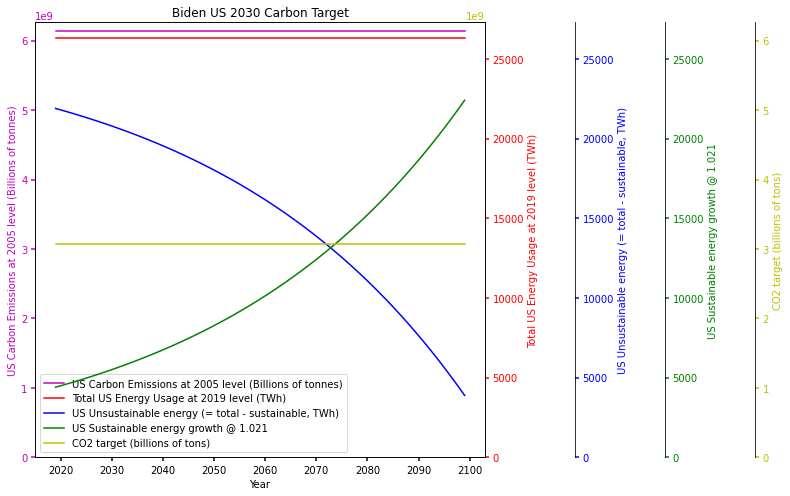

In [43]:
# US on current path


final_year = 2100

y_carbon_2005 = [us_carbon[2005] for x in range(2019, final_year)]

y_carbon_half_2005 = [us_carbon[2005]/2 for x in range(2019, final_year)]


y_total_energy = [26287 for x in range(2019, final_year)]

y_sustainable = [us_sustainable[2019]]
for i in range(2020, final_year):
    y_sustainable.append(y_sustainable[-1] * us_sustainable_rate)

    
y_unsustainable = [us_unsustainable[2019]]
for i,j in zip(y_total_energy[1:], y_sustainable[1:]):
    y_unsustainable.append(i-j)

lines = [
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_carbon_2005,
        'color':'m', 'label': f'US Carbon Emissions at 2005 level (Billions of tonnes)', 
        'ylim': [0, max(y_carbon_2005)+130000000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_total_energy,
        'color':'r', 'label': f'Total US Energy Usage at 2019 level (TWh)', 
        'ylim': [0, max(y_total_energy)+1000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_unsustainable,
        'color':'b', 'label': f'US Unsustainable energy (= total - sustainable, TWh)', 
        'ylim': [0, max(y_total_energy)+1000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_sustainable,
        'color':'g', 'label': f'US Sustainable energy growth @ {us_sustainable_rate:,.3f}', 
        'ylim': [0, max(y_total_energy)+1000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_carbon_half_2005,
        'color':'y', 'label': 'CO2 target (billions of tons)',
        'ylim': [0, max(y_carbon_2005)+130000000]
    }
]
flypy.plot_lines(lines, xlabel='Year', title='Biden US 2030 Carbon Target', plt_width_height=(10,8))

## What's required to meet Biden's Goal?

Given this scenario where US energy consumption stays constant, what is the required rate of increase of sustainable energy to meet Biden's target?

The next chart shows that about 11% growth gets the job done.

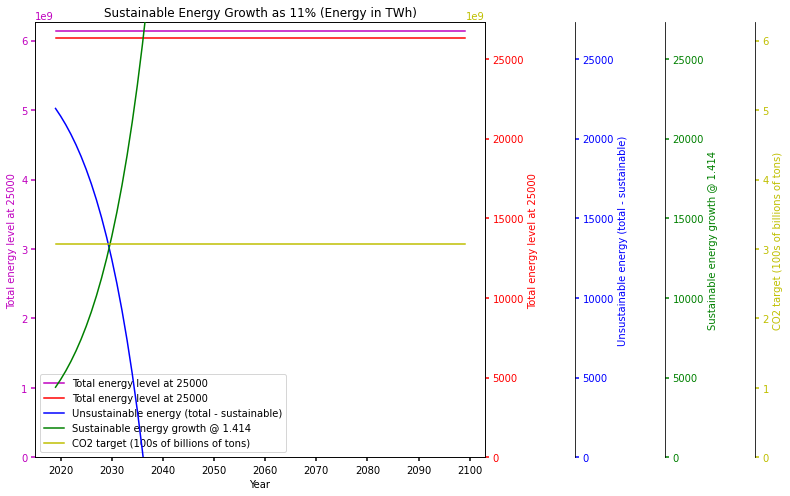

In [47]:
# US Climate action what rate is required


final_year = 2100


y_carbon_2019 = [us_carbon[2019] for x in range(2019, final_year)]

y_carbon_2005 = [us_carbon[2005] for x in range(2019, final_year)]

y_carbon_half_2005 = [us_carbon[2005]/2 for x in range(2019, final_year)]


y_total_energy = [26287 for x in range(2019, final_year)]

y_sustainable = [us_sustainable[2019]]
for i in range(2020, final_year):
    y_sustainable.append(y_sustainable[-1] * 1.11)

    
y_unsustainable = [us_unsustainable[2019]]
for i,j in zip(y_total_energy[1:], y_sustainable[1:]):
    y_unsustainable.append(i-j)

lines = [
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_carbon_2005,
        'color':'m-', 'label': f'Total energy level at {25000:.0f}', 
        'ylim': [0, max(y_carbon_2005)+130000000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_total_energy,
        'color':'r-', 'label': f'Total energy level at {25000:.0f}', 
        'ylim': [0, max(y_total_energy)+1000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_unsustainable,
        'color':'b-', 'label': f'Unsustainable energy (total - sustainable)', 
        'ylim': [0, max(y_total_energy)+1000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_sustainable,
        'color':'g-', 'label': f'Sustainable energy growth @ {1.414:,.3f}', 
        'ylim': [0, max(y_total_energy)+1000]
    },
    {
        'x': [year for year in range(2019, final_year)],  
        'y': y_carbon_half_2005,
        'color':'y-', 'label': 'CO2 target (100s of billions of tons)',
        'ylim': [0, max(y_carbon_2005)+130000000]
    }
]
flypy.plot_lines(lines, xlabel='Year', title='Sustainable Energy Growth as 11% (Energy in TWh)', plt_width_height=(10,8))

A Github notebook for this article can be found here - https://github.com/hugoleeney/jupyter_notebooks/blob/main/Environment/Climate%20Change%20Challenge.ipynb
